### 2.1   Algorithm efficiency assessment
In algorithm design, we pursue the following two objectives in sequence.

1. **Finding a Solution** to the Problem: The algorithm should reliably find the correct solution within the stipulated range of inputs.
2. Seeking the **Optimal Solution**: For the same problem, multiple solutions might exist, and we aim to find the most efficient algorithm possible.

> I have encountered many issues in cryptography, particularly in finding solutions to problems using a computer. Often, I did not consider the optimal solution. By focusing on finding the optimal solution, I can improve the quality of my work.

algorithm efficiency has become the main criterion for evaluating the merits of an algorithm, which includes the following two dimensions.

- **Time efficiency**: The speed at which an algorithm runs.
- **Space efficiency**: The size of the memory space occupied by an algorithm.

There are mainly two methods of efficiency assessment: actual testing and theoretical estimation.

#### 2.1.1   Actual testing

The most direct method is to use a computer to run these two algorithms and monitor and record their runtime and memory usage. On one hand, it's **difficult to eliminate interference from the testing environment**.On the other hand, **conducting a full test is very resource-intensive**.


#### 2.1.2   Theoretical estimation

Due to the significant limitations of actual testing, we can consider evaluating algorithm efficiency solely through calculations. This estimation method is known as **asymptotic complexity analysis**, or simply **complexity analysis**.

Complexity analysis reflects the relationship between the time and space resources required for algorithm execution and the size of the input data. It describes the *trend of growth in the time and space required by the algorithm as the size of the input data increases*.

Complexity analysis overcomes the disadvantages of actual testing methods, reflected in the following aspects:

- It is **independent** of the **testing environment** and applicable to all operating platforms.
- It can reflect algorithm efficiency under **different** data **volumes**, especially in the performance of algorithms with large data volumes.

### 2.2   Iteration and recursion
#### 2.2.1   Iteration
**For loops** The following function uses a for loop to perform a summation $\sum_{i=1}^ni=\frac{n(n+1)}{2}; i,n\in\mathbb{Z}$, with the sum being stored in the variable `res`. It's important to note that in Python, `range(a, b)` creates an interval that is inclusive of `a` but exclusive of `b`, meaning it iterates over the range from `a` up to `b`.

In [4]:
def for_loop(n: int) -> int:
    """for loop"""
    res = 0
    # Loop sum 1, 2, ..., n-1, n
    for i in range(1, n + 1):
        res += i
    return res


# if the n = 100, the result will be 5050 = n * (n + 1) / 2
print(for_loop(100))

5050


The number of operations in this summation function is proportional to the size of the input data $n$, or in other words, it has a linear relationship. This "**linear relationship**" is what time complexity describes. 

#### 2.2.2   Recursion

Recursion is an algorithmic strategy where a function solves a problem by calling itself. It primarily involves two phases:

- Calling: This is where the program repeatedly calls itself, often with progressively smaller or **simpler** arguments, moving towards the "termination condition."
- Returning: Upon triggering the "termination condition," the program begins to return from the deepest recursive function, **aggregating the results** of each layer.

From an implementation perspective, recursive code mainly includes three elements.

- Termination Condition: Determines when to switch from "calling" to "returning."
- Recursive Call: Corresponds to "calling," where the function calls itself, usually with smaller or more simplified parameters.
- Return Result: Corresponds to "returning," where the result of the current recursion level is returned to the previous layer.

In [5]:
def recur(n: int) -> int:
    """Recursion"""
    # Termination condition
    if n == 1:
        return 1
    # Recursive: recursive call
    res = recur(n - 1)
    # Return: return result
    return n + res


print(recur(100))

5050


- Iteration: Solves problems "from the bottom up." It starts with the most basic steps, and then repeatedly adds or accumulates these steps until the task is complete.
- Recursion: Solves problems "from the top down." It breaks down the original problem into smaller sub-problems, each of which has the same form as the original problem. These sub-problems are then further decomposed into even smaller sub-problems, stopping at the base case whose solution is known.

Interestingly, **if a function performs its recursive call as the very last step before returning**, it can be optimized by the compiler or interpreter to be as space-efficient as iteration. This scenario is known as **tail recursion**.

In [7]:
def tail_recur(n, res):
    """Tail recursion"""
    # Termination condition
    if n == 0:
        return res
    # Tail recursive call
    return tail_recur(n - 1, res + n)


print(tail_recur(100, 0))

5050


**Recursion tree** When dealing with algorithms related to "divide and conquer", recursion often offers a more intuitive approach and more readable code than iteration. Take the "Fibonacci sequence" as an example
 
Let the $n$ th number of the Fibonacci sequence be $f(n)$, it's easy to deduce two conclusions:

- The first two numbers of the sequence are $f(1)=0$ and  $f(2)=1$.
-  Each number in the sequence is the sum of the two preceding ones, that is, $f(n)=f(n-1)+f(n-2),n\geq3$
> like the math induction. 

In [15]:
def fib(n: int) -> int:
    """Fibonacci sequence: Recursion"""
    # Termination condition f(1) = 0, f(2) = 1
    if n == 1 or n == 2:
        return n - 1
    # recursive call & return
    return fib(n - 1) + fib(n - 2)


# Test cases
print(
    fib(1), fib(2), fib(3), fib(4), fib(5), fib(6), fib(7)
)  # Expected output: 0 1 1 2 3 5 8

0 1 1 2 3 5 8


#### 2.2.3   Comparison

Table: Comparison of Iteration and Recursion Characteristics

| Characteristic     | Iteration                                | Recursion                                                                 |
|--------------------|------------------------------------------|---------------------------------------------------------------------------|
| Approach           | Loop structure                           | Function calls itself                                                     |
| Time Efficiency    | Generally higher efficiency, no function call overhead | Each function call generates overhead                                     |
| Memory Usage       | Typically uses a fixed size of memory space | Accumulative function calls can use a substantial amount of stack frame space |
| Suitable Problems  | Suitable for simple loop tasks, intuitive and readable code | Suitable for problem decomposition, like trees, graphs, divide-and-conquer, backtracking, etc., concise and clear code structure |

### 2.3   Time complexity

#### 2.3.1   Assessing time growth trend

Time complexity analysis does not count the algorithm's run time, **but rather the growth trend of the run time as the data volume increases**

Assume the input data size is $n$, and consider three algorithms A, B, and C:

In [ ]:
# Time complexity of algorithm A: constant order
def algorithm_A(n: int):
    print(0)


# Time complexity of algorithm B: linear order
def algorithm_B(n: int):
    for _ in range(n):
        print(0)


# Time complexity of algorithm C: constant order
def algorithm_C(n: int):
    for _ in range(1000000):
        print(0)

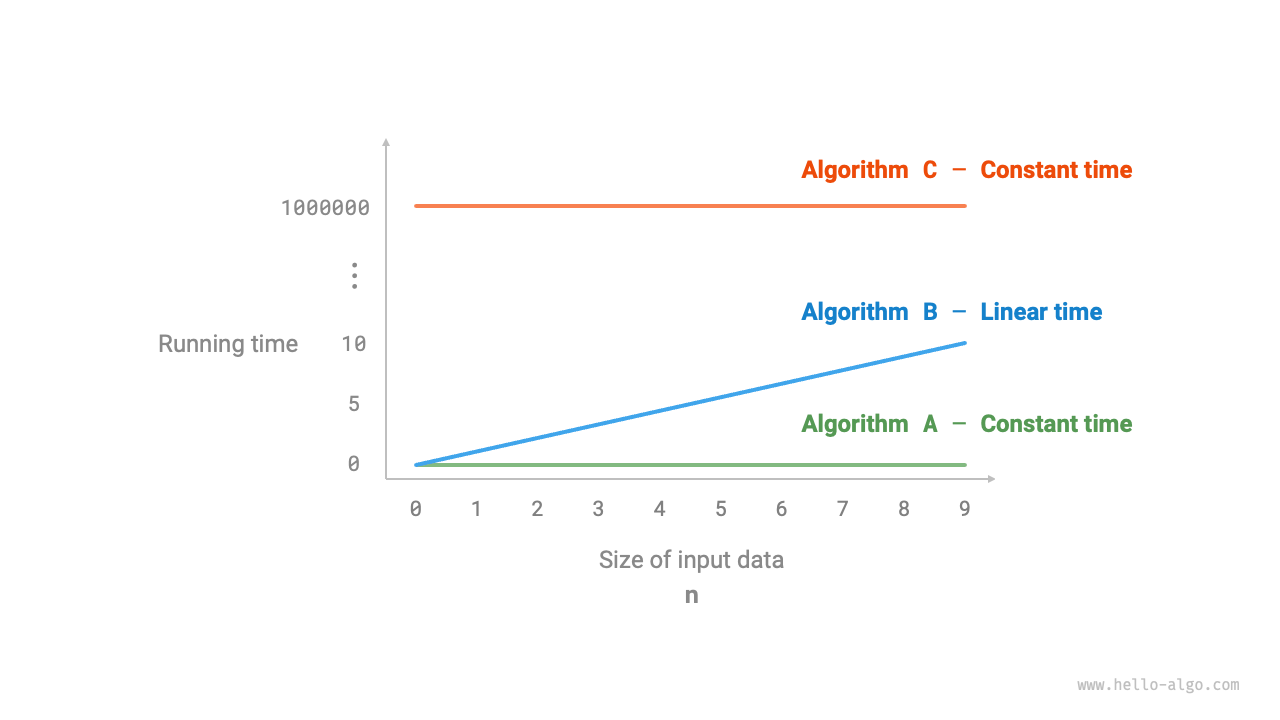

#### 2.3.2   Asymptotic upper bound

In [16]:
def algorithm(n: int):
    a = 1  # +1
    a = a + 1  # +1
    a = a * 2  # +1
    # Cycle n times
    for i in range(n):  # +1
        print(0)  # +1

Given a function that represents the number of operations of an algorithm as a function of the input size $n$, denoted as 
$T(n)$, consider the following example:
$$T(n)=3+2n$$
Since $T(n)$ is a linear function, its growth trend is linear, and therefore, its time complexity is of linear order, denoted as $O(n)$. This mathematical notation, known as **big-O notation**, represents the asymptotic upper bound of the function $T(n)$.

If there exist positive real numbers $c$ and $n_0$ such that for all $n>n_0$, $T(n)\leq cf(n)$, then $f(n)$ is considered an asymptotic upper bound of $T(n)$, denoted as $T(n)=O(f(n))$.

#### 2.3.4   Common types of time complexity

$$
O(1) < O(\log n) < O(n) < O(n\log n)  < \\ O(n^2) <  O(2^n) < O(n!) < O(n^n)
$$

$$
\text{Constant} < \text{Logarithmic} < \text{Linear} < \text{Linearithmic} \\ < \text{Quadratic} < \text{Exponential} < \text{Factorial} < \text{Super-exponential}
$$

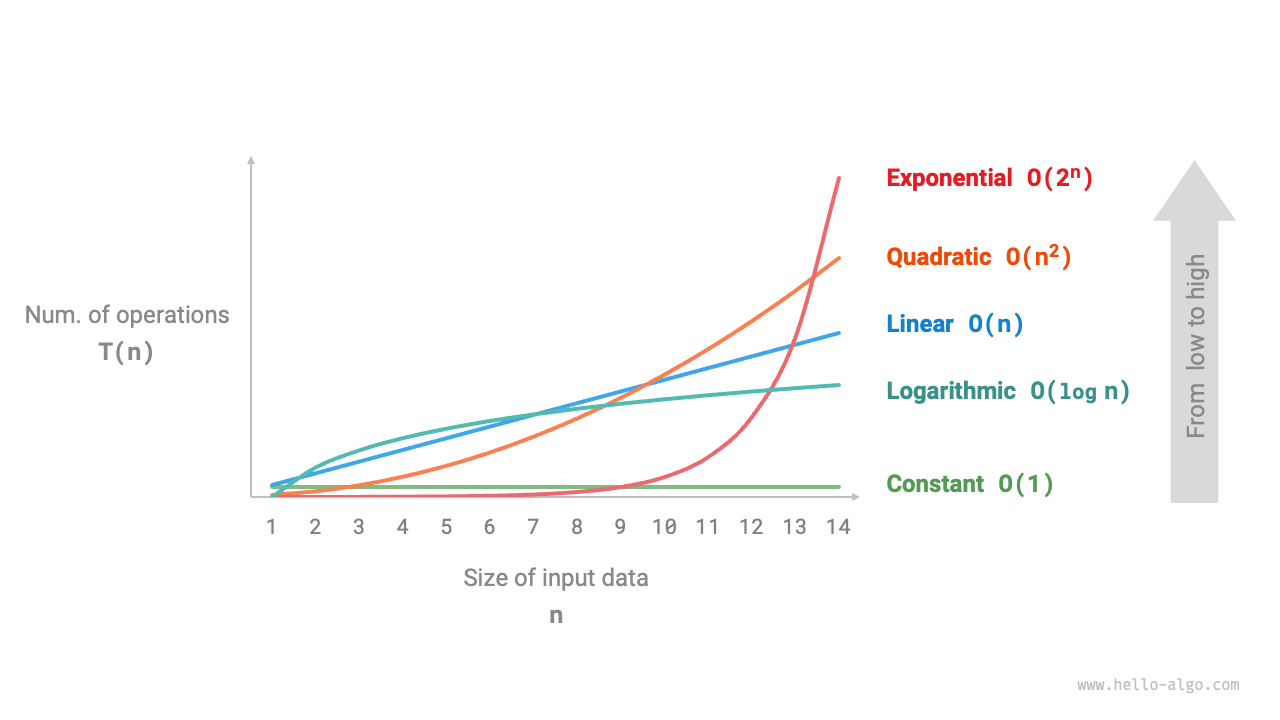

In [17]:
def exp_recur(n: int) -> int:
    """Exponential complexity (recursive implementation)"""
    if n == 1:
        return 1
    return exp_recur(n - 1) + exp_recur(n - 1) + 1

Exponential order growth is extremely rapid and is commonly seen in exhaustive search methods (brute force, backtracking, etc.). For large-scale problems, exponential order is unacceptable, often requiring **dynamic programming** or **greedy** algorithms as solutions.

#### 2.3.5   Worst, best, and average time complexities

**The time efficiency of an algorithm is often not fixed but depends on the distribution of the input data**.

- achieving the worst-case time complexity of $O(n)$, is asymptotic upper bound of the function $T(n)$
- achieving the best-case time complexity of $\Omega(1)$, is asymptotic lower bound of the function $T(n)$
- the average time complexity can reflect the algorithm's efficiency under random input data, denoted by the $\Theta$ notation

### 2.4 Space complexity

#### 2.4.1   Space related to algorithms

The memory space used by an algorithm during its execution mainly includes the following types.

- Input space: Used to store the input data of the algorithm.
- Temporary space: Used to store variables, objects, function contexts, and other data during the algorithm's execution.
- Output space: Used to store the output data of the algorithm.
Generally, the scope of space complexity statistics includes both "Temporary Space" and "Output Space".


Temporary space can be further divided into three parts.

- Temporary data: Used to save various constants, variables, objects, etc., during the algorithm's execution.
- Stack frame space: Used to save the context data of the called function. The system creates a stack frame at the top of the stack each time a function is called, and the stack frame space is released after the function returns.
- Instruction space: Used to store compiled program instructions, which are usually negligible in actual statistics.
> ROM ref to the instruction space. RAM ref to the temporary data and stack frame space.

When analyzing the space complexity of a program, we typically count the **Temporary Data, Stack Frame Space, and Output Data**.

#### 2.4.4   Balancing time and space

**Lowering time complexity usually comes at the cost of increased space complexity, and vice versa.** The approach of sacrificing memory space to improve algorithm speed is known as "space-time tradeoff"; the reverse is known as "time-space tradeoff".